In [26]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('BigData').getOrCreate()
df = spark.read.csv('datakocak.csv', header = "True", inferSchema = "True")
df.createOrReplaceTempView("datakocak")

df.show(50)

+---------------+-----+-----+
|           Nama|Nilai|Kelas|
+---------------+-----+-----+
|          AHMAD|   46|    6|
|        ARFENDO|   77|    6|
|      LATIFUDIN|   33|    6|
|          HENDI|   81|    6|
|      M. FERYAN|   75|    6|
|          RENDI|   94|    6|
|         NUREKA|   69|    6|
|          INDRA|   56|    5|
|     MOCH IDWAL|   81|    5|
|    REYNO YUSUF|   48|    5|
|  AHMAD MINANUL|   45|    4|
|         AFIZZA|   46|    4|
|            RIO|   77|    4|
|       MUKHOZIN|   88|    4|
|           ANDY|   56|    3|
|    STIFEN ZURO|   63|    5|
|         ROHMAT|   69|    3|
|      SAFRUDINI|   56|    2|
|  AFRIZAL AHMAD|   33|    4|
| MOHAMMAD HASIB|   76|    4|
|MUHAMMAD ENRICO|   56|    5|
|     MOH. LUKKY|   85|    1|
|   ADI ARISANDI|   87|    6|
|        M LIBAA|   81|    4|
|   ALIF NUZULUR|   42|    3|
|   YOGA PERMATA|   24|    5|
|    MOH. TAUFIK|   94|    2|
|DRAJAT AL AKBAR|   70|    3|
|  MUHAMMAD ARDY|   54|    1|
|      DWI BAGUS|   88|    2|
|   SATRIA

In [11]:
result_sum_avg_count= spark.sql('''
  SELECT
    SUM(Nilai) AS total_Nilai,
    AVG(Nilai) AS rata_rata_Nilai,
    COUNT(Nilai) AS jumlah_data
    FROM datakocak
''')
result_sum_avg_count.show()

+-----------+-----------------+-----------+
|total_Nilai|  rata_rata_Nilai|jumlah_data|
+-----------+-----------------+-----------+
|       3407|66.80392156862744|         51|
+-----------+-----------------+-----------+



In [17]:
data_baru =[
    ("Supini",6),
    ("Suprapto",4),
    ("Suprapti",3),
    ("Suratmin",5),
    ("Pangat",2),
    ("Tio",1),
]
df_baru = spark.createDataFrame(data_baru, ["Nama", "Kelas"])
df_baru.createOrReplaceTempView("data_wali")
df_baru.show()


+--------+-----+
|    Nama|Kelas|
+--------+-----+
|  Supini|    6|
|Suprapto|    4|
|Suprapti|    3|
|Suratmin|    5|
|  Pangat|    2|
|     Tio|    1|
+--------+-----+



In [25]:
spark.sql('''
  SELECT d.Nama, d.Nilai, d.Kelas, w.Nama
  FROM datakocak d JOIN data_wali w
  ON d.Kelas = w.Kelas
''').show(50)

+---------------+-----+-----+--------+
|           Nama|Nilai|Kelas|    Nama|
+---------------+-----+-----+--------+
|          ALISA|   88|    6|  Supini|
|       M. RISKI|   20|    6|  Supini|
|  MOHAMMAD AZIZ|   88|    6|  Supini|
|   ADI ARISANDI|   87|    6|  Supini|
|         NUREKA|   69|    6|  Supini|
|          RENDI|   94|    6|  Supini|
|      M. FERYAN|   75|    6|  Supini|
|          HENDI|   81|    6|  Supini|
|      LATIFUDIN|   33|    6|  Supini|
|        ARFENDO|   77|    6|  Supini|
|          AHMAD|   46|    6|  Supini|
|        BADIYAH|   45|    4|Suprapto|
|          NIKEN|   54|    4|Suprapto|
|        M LIBAA|   81|    4|Suprapto|
| MOHAMMAD HASIB|   76|    4|Suprapto|
|  AFRIZAL AHMAD|   33|    4|Suprapto|
|       MUKHOZIN|   88|    4|Suprapto|
|            RIO|   77|    4|Suprapto|
|         AFIZZA|   46|    4|Suprapto|
|  AHMAD MINANUL|   45|    4|Suprapto|
|      AL FAROSA|   96|    3|Suprapti|
|    MUH. FADLIL|   88|    3|Suprapti|
|          RICKO|   96|  

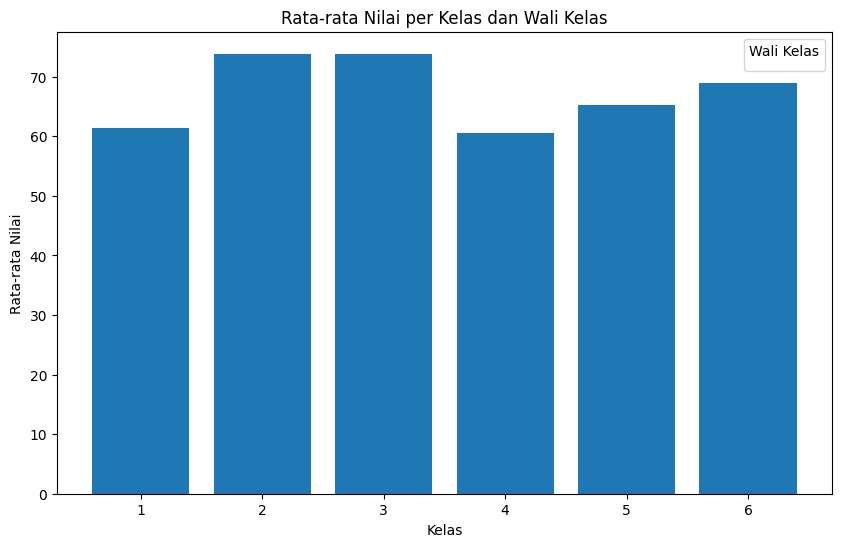

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
avg_per_kelas = spark.sql('''
    SELECT w.Nama AS wali_kelas, d.Kelas, AVG(d.Nilai) AS rata_rata_nilai
    FROM datakocak d
    JOIN data_wali w ON d.Kelas = w.Kelas
    GROUP BY w.Nama, d.Kelas
    ORDER BY d.Kelas
''')

# Konversi hasil ke Pandas DataFrame
df_avg_per_kelas = avg_per_kelas.toPandas()

# Membuat bar chart untuk rata-rata nilai per kelas
plt.figure(figsize=(10, 6))
plt.bar(df_avg_per_kelas['Kelas'], df_avg_per_kelas['rata_rata_nilai'])
plt.title("Rata-rata Nilai per Kelas dan Wali Kelas")
plt.xlabel("Kelas")
plt.ylabel("Rata-rata Nilai")
plt.legend(title="Wali Kelas")
plt.show()